# CS166 Session 4.2 PCW #

## Testing the Forest Fire Sim ##

In [144]:
# Simple CA simulator in Python
#
# *** Forest fire ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu

# Modified to run with Python 3

# import matplotlib
# matplotlib.use('TkAgg')
import numpy as np 
import pylab as PL
import random as RD
import scipy as SP
import matplotlib.pyplot as plt

RD.seed()

width = 100
height = 100
initProb = 0.4
empty, tree, fire, char = range(4)

def init(initProb):
    global time, config, nextConfig
    global burns, curr_burn, trees


    time = 0
    
    trees = 0
    curr_burn = 0 
    burns = []
    
    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
                trees += 1
            else:
                state = empty
            config[y, x] = state
    config[height//2, width//2] = fire

    nextConfig = SP.zeros([height, width])

def draw():
    global time, config, nextConfig


    PL.cla()
#     PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.imshow(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)

#     PL.axis('image')
#     PL.title('t = ' + str(time))
    return burns

def step(prob_burn):
    global time, config, nextConfig
    global burns, curr_burn

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
                curr_burn += 1
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            if RD.random() < prob_burn:
                                state = fire
                             
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config
    burns.append(curr_burn/trees)

# import pycxsimulator
# pycxsimulator.GUI().start(func=[init,draw,step])

## Analyzing the Burning Forest Simulation ## 

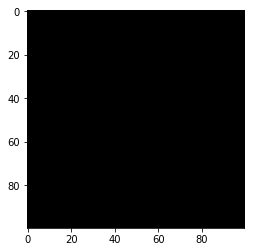

In [145]:
RD.seed()

width = 100
height = 100
empty, tree, fire, char = range(4)

# Record burns 
trees = 0
curr_burn = 0 
burns = [] # Represents the desnity of trees burned 

init(1)
for i in range(60):
    step()
    draw()


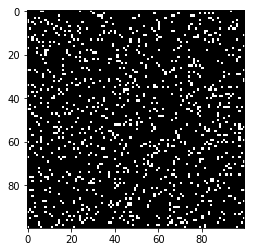

In [161]:
# Record burns 
trees = 0
curr_burn = 0 
burns = [] # Represents the desnity of trees burned 

steps = 100
probs = [0.1, 0.3, 0.5, 0.37, 0.39, 0.7, 0.9]


burn_densities = []

for p in probs:
    init(p)
    for i in range(steps):
        step()
        draw()
    burn_densities.append(burns)
    


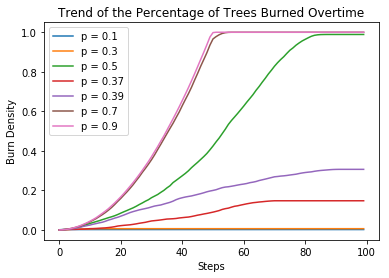

In [162]:
for i in range(len(burn_densities)):
    plt.plot(list(range(steps)), burn_densities[i], label = f'p = {probs[i]}')
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Burn Density")
plt.title("Trend of the Percentage of Trees Burned Overtime")

plt.show()


### Analysis ### 

In the figure above, p represents the perentage of trees in our area. For p values 0.1 and 0.3, it shows that there will be no spread of fire and will not burn the entire forest. However, for p's 0.3 and above, we can the entire forest will be burned. As we increase the p value, the time it takes for the forest to burn decreases and the rate at which the number of current trees burn increases. 

However, for p's 0.37 and 0.39, they are based on the critical point (p = 0.38) that the reading suggested and we can see here that 0.39 and 0.37 rests in the middle ground between the burned p's and the no burn p's. It is said that p's that are greater than 38 would lead to forests that will brun while the ones less than 0.38 will not burn. 

## Excercise 12.8 ## 

It is not safe to assume that the relationship between the different scaling of the blocks can be applied to larger scales because in Figure 12.6, it shows that we start to assume that the smaller blocks are a whole (with no gaps inside) which is the same as having a single block of trees. As we increase the scale of our block, we simplify and already make assumptions on the smaller scales that they can actually perform conductance which in fact gets more complicated since we are considering more spaces to be simplified. 

## Stretch Goal ## 



In [163]:
def step(prob_burn):
    global time, config, nextConfig
    global burns, curr_burn

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
                curr_burn += 1
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            if RD.random() < prob_burn:
                                state = fire
                             
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config
    burns.append(curr_burn/trees)